In [83]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.neural_network import MLPClassifier

data = pd.read_csv('wdbc.data', header = None)

In [84]:
#Create train, validation and test datasets
size_df = data.shape
x_train, x_test, y_train,y_test = train_test_split(data.iloc[:,2:size_df[1]], data.iloc[:,1], test_size = 0.30)
x_test, x_valid, y_test, y_valid = train_test_split(x_test,y_test, test_size = 0.5)

In [108]:
# Possible parameters you can modify for best results
# hidden_layer_sizes (n_layers -2)
# activation funcion de activacion 'identity' 'logistic' 'tanh' 'relu'
# solver weight optimization 'lbfgs', 'sgd', 'adam'
# learning_rate_int controlls the steps for updating the weights, it works only for: solver = 'sgd' y 'adam'
# learning_rate 'constant' 'invscaling', 'adaptive'
# tol optimization tolerance default = 1e-4
# random_state determines a generation rand number of weights and bias 
# early_stopping = True

layers = np.arange(1,100,step  = 10)
nodes = np.arange(1,100,step = 10)
aux = 0

for i in layers:
    for j in nodes:
            capas = np.array([i,j])
            clf = MLPClassifier(random_state = 1, hidden_layer_sizes = capas, max_iter = 1000).fit(x_train, y_train)
            score = clf.score(x_valid,y_valid)
            if (score > aux):
                aux = score
                b_config = capas

In [109]:
func_act = ['identity', 'logistic', 'tanh', 'relu']
solucion = ['lbfgs', 'sgd', 'adam']
tolerance = [1, .1, .01, .001, .0001, .00001, .000001]
print(aux, b_config)

0.9883720930232558 [31 11]


In [110]:
aux = 0
for i in func_act:
    clf = MLPClassifier(random_state = 1, hidden_layer_sizes = b_config, max_iter = 1000, activation = i).fit(x_train, y_train)
    score = clf.score(x_valid,y_valid)
    if (score > aux):
        aux = score
        b_func = i  

In [111]:
aux = 0
for i in solucion:
    clf = MLPClassifier(random_state = 1, hidden_layer_sizes = b_config, activation = b_func,
                        max_iter = 1000, solver = i).fit(x_train, y_train)
    score = clf.score(x_valid,y_valid)
    if (score > aux):
        aux = score
        b_sol = i 

C:\Users\royso\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [112]:
aux = 0
for i in tolerance:
    clf = MLPClassifier(random_state = 1, hidden_layer_sizes = b_config, activation = b_func, tol = i, 
                        max_iter = 1000, solver = b_sol).fit(x_train, y_train)
    score = clf.score(x_valid,y_valid)
    if (score > aux):
        aux = score
        b_tol = i 

In [113]:
print('best parameters are \n', b_config,'\n', b_func, '\n', b_sol, '\n', b_tol, '\n these, gives a score of ', aux)

los mejores parametros son 
 [31 11] 
 relu 
 adam 
 0.0001 
 estos parametros dan un score de  0.9883720930232558


0.9764705882352941


[]

<Figure size 360x360 with 0 Axes>

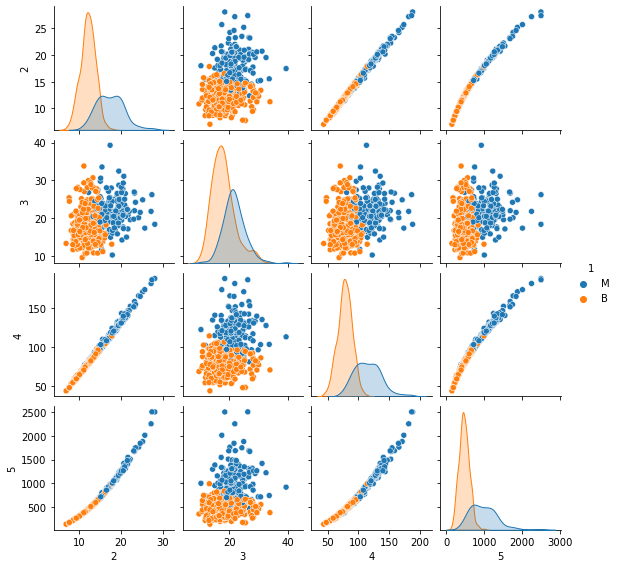

In [114]:
clf = MLPClassifier(random_state = 1, hidden_layer_sizes = b_config, activation = b_func, tol = b_tol,max_iter = 1000,
                    solver = b_sol).fit(x_train, y_train)
print(clf.score(x_test,y_test))

fig2 = plt.figure(figsize = (5,5))
fig2 = sns.pairplot(data.iloc[:,1:6],hue = 1, height=2, aspect=1)
plt.plot()